In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# The Goal of Curve Fitting

Purpose of interpolation

Given some $x_{\text{data}}=[...]$ and $y_{\text{data}}=[...]$ and a model function $f$ that depends on unknown parameters $\beta$ the goal is to find the optimal set of parameters $\beta$ such that the function $y=f(x,\beta)$ *best resembles* the data.

* One way of doing this is to minimize $\sum_i (f(x_i,\beta) - y_i)^2$ by adjusting the parameters in $\beta$. Here $x_i$ and $y_i$ are the ith data point. This is called the method of least squares

* If the $y_i$ data points have corresponding errors on them, then minimizing $\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$ gives the so called **maximum-likelihood** estimate for $\beta$. Given the data $x_i$ and $y_i$, the the value of $\beta$ obtained through this method is the most likely configuration.

Lets look at some sample data

In [5]:
x_data = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566   ])

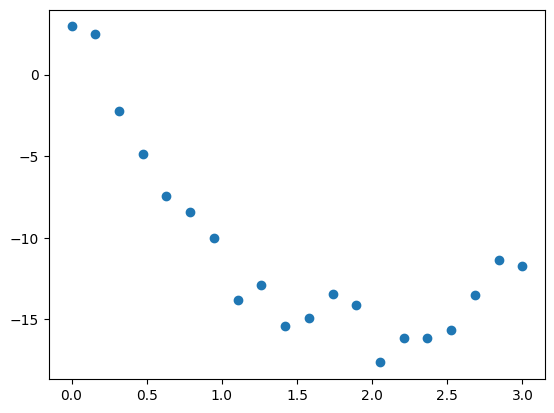

In [6]:
plt.scatter(x_data, y_data)

Here is a model where $\beta = (a,b,c)$ and

$$f(x, \beta) = f(x, a, b, c) = a(x-b)^2 + c$$

We want to find the optimal values of $a$, $b$, and $c$ that fit the data above

This requires two steps

1. Define model function
2. Use scipy's `curve_fit` function. This requires giving initial guesses for $\beta$, which one needs to obtain carefuly for complicated models, or else the function might not work.

In [7]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

In [8]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3, 2, -16])

Two things are returned here:

1. `popt`, which gives the optimal parameters for the `model_f` given the data 

In [9]:
popt

array([  4.92207991,   2.00492121, -16.04690266])

2. `pcov`: the covariance matrix, which gives an estimate of the "error" of the parameters (based on how sensitive the "goodness-of-fit" is to changing them) and the relation the parameters have to eachother (are two seperate parameters really needed?)

In [10]:
pcov

array([[ 0.12827822, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

Lets plot the function with the optimal parameters next to the data

In [11]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

Plot

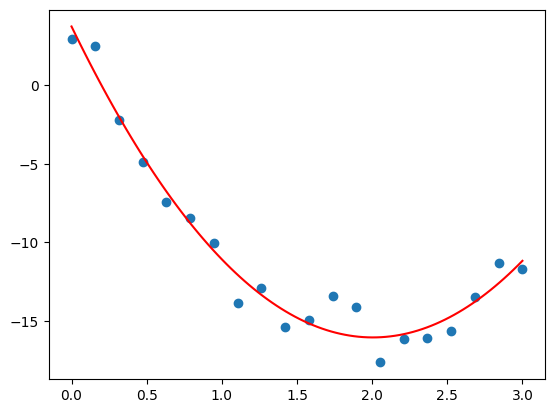

In [12]:
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, 'r')

`pcov` is difficult to interpret, but we can do so as follows.

* the "error" of a parameter in the model is related to how sensitive the model is to that parameter. Does changing the parameter slightly give a better fit? (i.e. minimize $\sum_i (f(x_i,\beta) - y_i)^2$)

Lets look at an example below

In [23]:
def fit_f(x, a, b, c, d):
    return a*(x-b)**2 + c + 0.0001*d*np.cos(x)

In [24]:
popt, pcov = curve_fit(fit_f, x_data, y_data, p0=[1,2,-16,1])

Lets look at a color plot of the `pcov` matrix:

In [25]:
pcov # error in d is very large

array([[ 1.45024157e-01, -4.03732292e-02,  4.08921392e-02,
         3.05314578e+03],
       [-4.03732292e-02,  7.20536914e-02, -3.07488304e-01,
        -8.46750721e+03],
       [ 4.08921392e-02, -3.07488304e-01,  1.52776217e+00,
         3.78842284e+04],
       [ 3.05314578e+03, -8.46750721e+03,  3.78842284e+04,
         1.03326868e+09]])

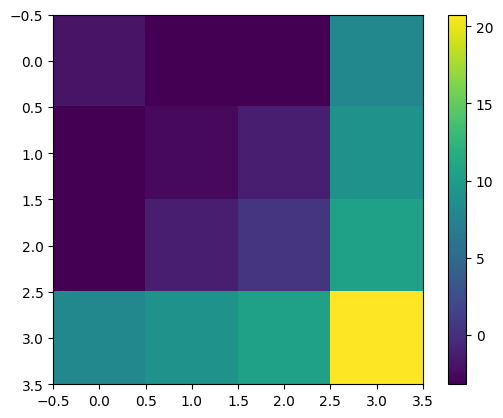

In [27]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar() 

# here is shown that changing on the d parameters dont have much effect on the model, could be get rid of

# Examples

**Example 1: Fitting Gaussian Curves**

Open some data

In [35]:
df = pd.read_csv('curvefite1.csv')
y_stuff = df.Cs137
x_stuff = df.Channel

Make a plot

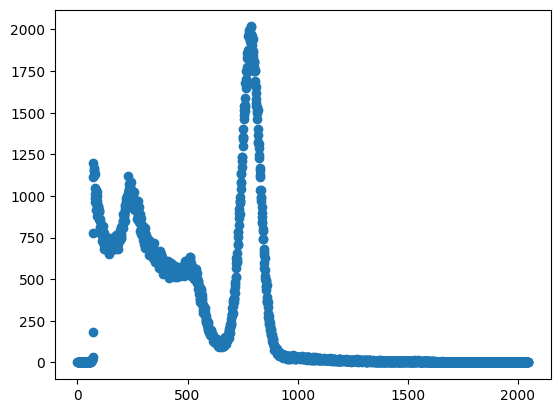

In [36]:
plt.scatter(x_stuff, y_stuff)

This curve represents the photon spectrum of Cesium 137 (a common radioactive substance). The main curve represents the primary photon emission peak.

* The mean value of the peak tells us about the energy of photons emitted
* The Width tells us about the resolution of the detector.

Typically we fit peaks like this to Gaussian curves and use $\mu$ and $\sigma$ to extract information about the two points above

$$f(x, A, \mu, \sigma) = Ae^{-(x-\mu)^2/\sigma^2}$$

In [46]:
def gauss_f(x, A, mu, sig):
    return A*np.exp(-(x-mu)**2/sig**2)

First we need to get the region of the data we're interested in

In [47]:
x_data = x_stuff[(x_stuff>725) & (x_stuff<850)]
y_data = y_stuff[(x_stuff>725) & (x_stuff<850)]

Plot the subregion

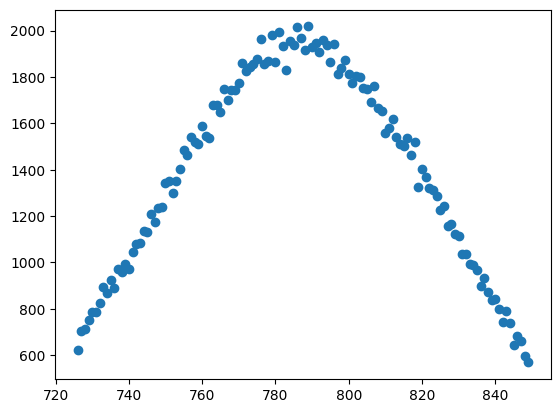

In [48]:
plt.scatter(x_data, y_data)
plt.show()

Now we curve fit to get the optimal parameters of the Gaussian curve

In [49]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, p0=[2000, 790, 60])

In [51]:
A_opt, mu_opt, sig_opt = popt # mu is mean, sig is the resolution 

In [53]:
popt

array([1939.55510383,  786.33851861,   57.78717218])

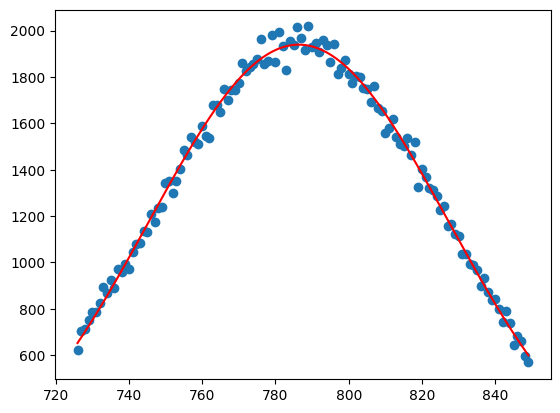

In [59]:
plt.scatter(x_data, y_data)
x_model = np.linspace(min(x_data), max(x_data), 1000)
plt.plot(x_model, gauss_f(x_model, A_opt, mu_opt, sig_opt), 'r')

In [68]:
np.sqrt(np.diag(pcov))

array([5.70257763, 0.14401935, 0.26427165])

**Example 2**

Now suppose the data above has errors given by $\delta_{y_i} = \sqrt{y_i}$ for each data point $y_i$. (These are the true errors for a counting experiment).

In [70]:
yerr_data = np.sqrt(y_data)

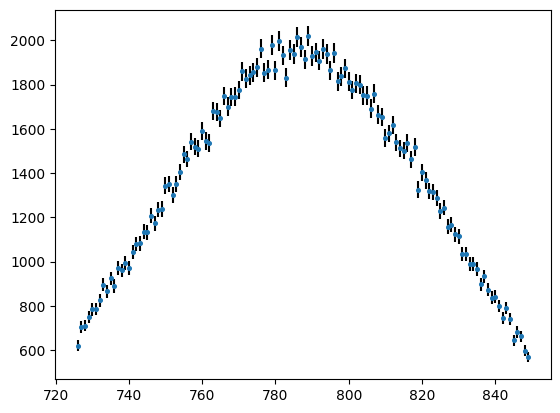

In [73]:
plt.errorbar(x_data, y_data, yerr_data, ls='', color='k')
plt.scatter(x_data, y_data, s=7, zorder=1000)

We can get the maximum likelihood estimator using `curve_fit`. 

In [75]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, sigma=yerr_data, p0=[2000, 790, 60])
popt

array([1936.83040985,  786.29515455,   57.88161227])

Note that the answer is slightly different than above. If all the $\delta_{y_i}$ are the same then the answer doesn't differ from no errors at all.

**Example 3**

The Leonard Weibeck Potential is given by

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]$$

Find the optimal values for $\sigma$ and $\epsilon$

In [86]:
r_data, V_data = np.loadtxt('curvefite2.txt')

Text(0, 0.5, '$V(r)$ [J]]')

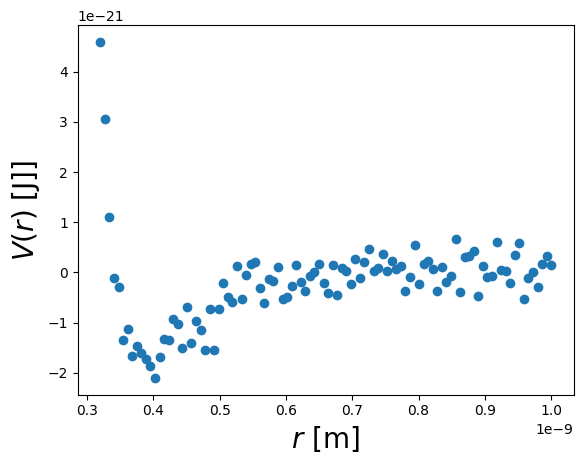

In [87]:
plt.scatter(r_data, V_data)
plt.xlabel('$r$ [m]', fontsize=20)
plt.ylabel('$V(r)$ [J]]', fontsize=20)

First its probably a good idea to standardize our units. We can convert back after:

* Multiply x-axis by `1e9`. This converts all quantities with dimenions of **meters** in this problem to **nanometers**

* Divide y-axis by Boltzmann constant $k_B=1.3806452 × 10-23J/K$ This converts all quantites with dimensions of **joules** to **Kelvin**

In [88]:
r_data *= 1e9
V_data /= 1.38e-23

Text(0, 0.5, '$V(r)$ [J]]')

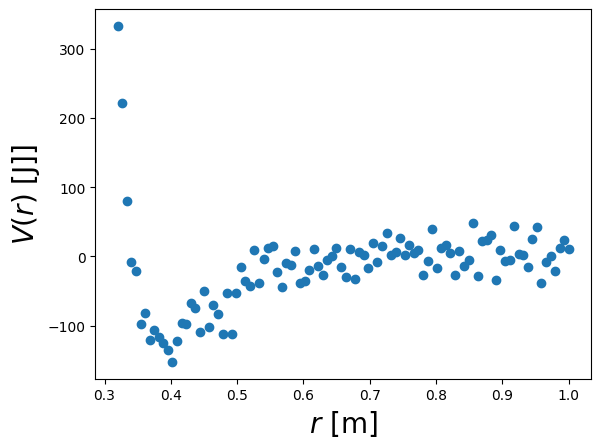

In [89]:
plt.scatter(r_data, V_data)
plt.xlabel('$r$ [m]', fontsize=20)
plt.ylabel('$V(r)$ [J]]', fontsize=20)

In order to fit this data to the curve, we need to identify some key points for out initial parameter guess. From wikipedia:

* The minimum of $V(r)$ is at $r=2^{1/6}\sigma$
* At the minimum, the potential has a value of $V(r)=-\epsilon$

In [108]:
def model_f(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

Obtain initial guesses

In [109]:
eps_init_guess = 120
sig_init_guess = 2**(-1/6) * 0.4

Get the optimal parameters

In [110]:
popt, pcov = curve_fit(model_f, r_data, V_data, p0=[sig_init_guess, eps_init_guess])
sig_opt, eps_opt = popt

Lets plot data next to model

In [111]:
r_model = np.linspace(min(r_data), max(r_data), 1000)
V_model = model_f(r_model, sig_opt, eps_opt)

Text(0, 0.5, '$V(r)$ [J]]')

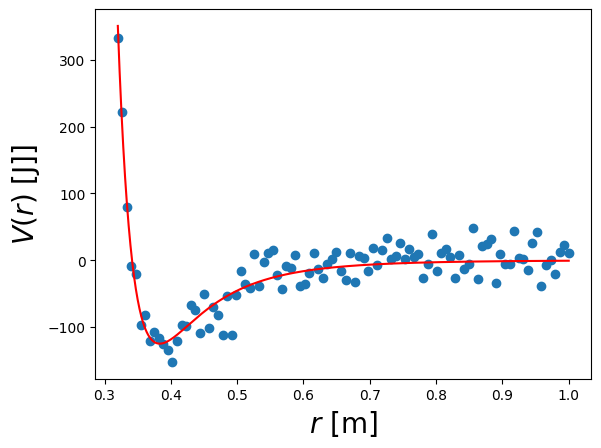

In [112]:
plt.scatter(r_data, V_data)
plt.plot(r_model, V_model, 'r')
plt.xlabel('$r$ [m]', fontsize=20)
plt.ylabel('$V(r)$ [J]]', fontsize=20)

In [113]:
sig_opt

0.3414387956024161

In [114]:
eps_opt

124.98902614668191